# Chapter2
## Perception, Logistic Regerssion, Linear Regression

### 建模型前先設定一些操參數


1.   資料分成多少batch
2.   丟進去的feature數
3.   return的feature數
4.   epoch number:做幾個iteration
5.   learning rate







In [ ]:
batch_n = 100
in_features = 3
out_features = 1
epoch_n = 100
learning_rate = 0.001

### 目標:線性回歸

In [ ]:
import torch

In [ ]:
#假設 y = 3x_1 + 5x_2 + 1x_3
x = torch.rand(batch_n, in_features) #訓練模型的資料(100筆,3欄)
c = torch.Tensor([[3.], [5.], [1.]]) #vector 但要排成直的才能和x相乘->做成二維陣列
y = x.mm(c) #matrix multiply
#資料量少，太容易train->增加雜訊
y = y.add(torch.rand(batch_n, out_features))
y

### 建立模型
#### 資料分析: 畫散佈圖

In [ ]:
import matplotlib.pyplot as plt

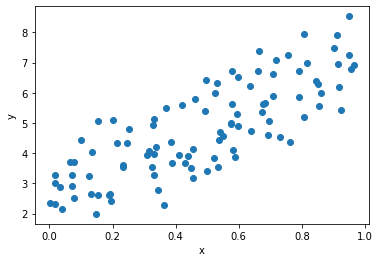

In [ ]:
plt.figure() #先建立figure物件
plt.scatter(x[:,1], y)  #取x1時會發現較集中(共線性高),因為係數為5
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
w = torch.rand(in_features, out_features) #目標:藉由train讓w接近3,5,1
w

tensor([[0.7417],
        [0.4617],
        [0.5818]])

#### Gradient Descent
1. 先把資料丟到模型內，得到預測結果y^

2. y^和y算loss function

3. 計算gradient

4. update參數

### 土法煉鋼(有時候辦法用pytorch套件)

In [ ]:
for epoch in range(epoch_n):
  y_pred = x.mm(w)
  loss = (y_pred-y).pow(2).sum() #mse，取sum和取avg差不多
  print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))

  grad_y_pred = 2 * (y_pred-y) #(100x1)的vector
  grad_w = x.t().mm(grad_y_pred) #x為(100x3)->轉置成(3x100)
  #(3x100)x(100x1)->目標3x1
  
  w -= learning_rate * grad_w #update w


Epoch:0, Loss:1728.7399
Epoch:1, Loss:1270.3756
Epoch:2, Loss:937.5721
Epoch:3, Loss:695.8423
Epoch:4, Loss:520.1736
Epoch:5, Loss:392.4255
Epoch:6, Loss:299.4416
Epoch:7, Loss:231.6796
Epoch:8, Loss:182.2192
Epoch:9, Loss:146.0407
Epoch:10, Loss:119.5038
Epoch:11, Loss:99.9677
Epoch:12, Loss:85.5172
Epoch:13, Loss:74.7631
Epoch:14, Loss:66.6974
Epoch:15, Loss:60.5890
Epoch:16, Loss:55.9076
Epoch:17, Loss:52.2680
Epoch:18, Loss:49.3910
Epoch:19, Loss:47.0738
Epoch:20, Loss:45.1690
Epoch:21, Loss:43.5696
Epoch:22, Loss:42.1979
Epoch:23, Loss:40.9973
Epoch:24, Loss:39.9266
Epoch:25, Loss:38.9557
Epoch:26, Loss:38.0626
Epoch:27, Loss:37.2313
Epoch:28, Loss:36.4499
Epoch:29, Loss:35.7098
Epoch:30, Loss:35.0044
Epoch:31, Loss:34.3290
Epoch:32, Loss:33.6800
Epoch:33, Loss:33.0544
Epoch:34, Loss:32.4503
Epoch:35, Loss:31.8659
Epoch:36, Loss:31.2999
Epoch:37, Loss:30.7512
Epoch:38, Loss:30.2190
Epoch:39, Loss:29.7024
Epoch:40, Loss:29.2009
Epoch:41, Loss:28.7137
Epoch:42, Loss:28.2405
Epoch:43

In [ ]:
w #因為在y中有加雜訊，所以不會是3,5,1
#係數位差最大的會是細數最小的那欄->共線性越高，受雜訊影響越少;共線性越低，受雜訊影響越多

tensor([[3.2706],
        [4.7959],
        [1.8659]])

### 用pytorch套件 Auto-grad
#### 是利用數值方法去逼近，所以當模型複雜時誤差會變大->用手算偏微分(土法煉鋼)可能會較準

In [ ]:
from torch.autograd import Variable

In [ ]:
Vx = Variable(x, requires_grad=False) #x tenser放到Variable，因為不用算x的grad->requires_grad=False
Vy = Variable(y, requires_grad=False)
Vw = Variable(torch.rand(in_features, out_features), requires_grad=True) 


In [ ]:
for epoch in range(epoch_n):
  y_pred = Vx.mm(Vw)
  loss = (y_pred-Vy).pow(2).sum() #mse，取sum和取avg差不多
  print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))

  loss.backward() #會自動把可以計算gradient的都算好
  
  Vw.data -= learning_rate *Vw.grad.data  #grad放在Variable物件的.grad.data

  Vw.grad.data.zero_()  #做loss.backword時會把grad累加進去，值會有問題->每個loop要歸零
  

Epoch:0, Loss:1788.9257
Epoch:1, Loss:1312.3743
Epoch:2, Loss:966.4219
Epoch:3, Loss:715.1953
Epoch:4, Loss:532.6779
Epoch:5, Loss:400.0009
Epoch:6, Loss:303.4792
Epoch:7, Loss:233.1877
Epoch:8, Loss:181.9279
Epoch:9, Loss:144.4790
Epoch:10, Loss:117.0541
Epoch:11, Loss:96.9069
Epoch:12, Loss:82.0452
Epoch:13, Loss:71.0240
Epoch:14, Loss:62.7951
Epoch:15, Loss:56.5981
Epoch:16, Loss:51.8814
Epoch:17, Loss:48.2445
Epoch:18, Loss:45.3971
Epoch:19, Loss:43.1282
Epoch:20, Loss:41.2848
Epoch:21, Loss:39.7556
Epoch:22, Loss:38.4598
Epoch:23, Loss:37.3386
Epoch:24, Loss:36.3493
Epoch:25, Loss:35.4606
Epoch:26, Loss:34.6498
Epoch:27, Loss:33.9003
Epoch:28, Loss:33.1998
Epoch:29, Loss:32.5394
Epoch:30, Loss:31.9123
Epoch:31, Loss:31.3137
Epoch:32, Loss:30.7398
Epoch:33, Loss:30.1878
Epoch:34, Loss:29.6556
Epoch:35, Loss:29.1415
Epoch:36, Loss:28.6441
Epoch:37, Loss:28.1623
Epoch:38, Loss:27.6955
Epoch:39, Loss:27.2426
Epoch:40, Loss:26.8033
Epoch:41, Loss:26.3768
Epoch:42, Loss:25.9628
Epoch:43

In [ ]:
Vw.data

tensor([[3.2915],
        [4.8242],
        [1.8150]])

###Torch nn.Module 將模型包成一個類別，宣告成物件
#### 複雜模型會有多個Variable，不可能宣告那麼多variable

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module): #類別名稱第一個字大寫，()繼承所有傳統的類神經; 
  def __init__(self): #有些東西會寫成抽象類別，因為一開始不知道模型架構。任何類別都會有Constructor，若要用父類別建構好的東西，要在自己程式中呼叫父類別Constructor
    super(Model, self).__init__()
  def forward(self, x, w): #model如何建構起來
    y_pred = x.mm(w)
    return y_pred
  def backward(self): #已被實作->pass
    pass


In [ ]:
modle = Model()
Vw = Variable(torch.rand(in_features, out_features), requires_grad=True)


In [ ]:
for epoch in range(epoch_n):
  y_pred = modle(Vx,Vw)
  loss = (y_pred-Vy).pow(2).sum() #mse，取sum和取avg差不多
  print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))

  loss.backward() #會自動把可以計算gradient的都算好
  
  Vw.data -= learning_rate *Vw.grad.data  #grad放在Variable物件的.grad.data

  Vw.grad.data.zero_()  #做loss.backword時會把grad累加進去，值會有問題->每個loop要歸零
  

In [ ]:
Vw.data

tensor([[3.2019],
        [4.8477],
        [1.8831]])

### loss function

In [ ]:
#使用torch.nn提供的layer
class Model(nn.Module): #類別名稱第一個字大寫，()繼承所有傳統的類神經; 
  def __init__(self): #有些東西會寫成抽象類別，因為一開始不知道模型架構。任何類別都會有Constructor，若要用父類別建構好的東西，要在自己程式中呼叫父類別Constructor
    super(Model, self).__init__()
    self.linear = nn.Linear(in_features, out_features, False) #nn.Linear建一個類別叫self.linear; False:不要bias項(常數項)
  def forward(self, x): #不需要w了，因為用內建loss function
    y_pred = self.linear(x)
    return y_pred
  def backward(self): #已被實作->pass
    pass

In [ ]:
model = Model()
loss_fn = nn.MSELoss() #loss function
print(model)

Model(
  (linear): Linear(in_features=3, out_features=1, bias=False)
)


In [ ]:
for epoch in range(epoch_n*100):  #下面loss是取平均過後，所以loss是上面的1/100->收斂速度變慢->epoch_n*100
  y_pred = model(x)
  loss = loss_fn(y_pred, y) #(預測結果,實際答案)
  if (epoch+1)%100 == 0: #每100次輸出一次loss
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))
  model.zero_grad() #計算gradient前把gradient歸零，因為linear layer內會先隨機給gradient一個initial值，所以要先清除才不會影響backward
  loss.backward() #會自動把可以計算gradient的都算好
  for param in model.parameters(): #每層參數放到list中->用for取 (現在只有一層->可寫model.parameters(0))
    param.data -= learning_rate*param.grad.data

In [ ]:
 for param in model.parameters(): 
    print(param.data) #param為一個object

In [ ]:
model = Model()

In [ ]:
 for param in model.parameters(): #確認是否是新的
    print(param.data)  

tensor([[-0.2874, -0.3100, -0.1515]])


### optimizier

In [ ]:
import torch.optim as opt

In [ ]:
optimizer = opt.SGD(model.parameters(), lr=learning_rate) #SGD隨機update速度較快 (update對象,learning_rate)

In [ ]:
for epoch in range(epoch_n*100):  #下面loss是取平均過後，所以loss是上面的1/100->收斂速度變慢->epoch_n*100
  y_pred = model(x)
  loss = loss_fn(y_pred, y) #(預測結果,實際答案)
  if (epoch+1)%100 == 0: #每100次輸出一次loss
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))
  model.zero_grad() #計算gradient前把gradient歸零，因為linear layer內會先隨機給gradient一個initial值，所以要先清除才不會影響backward
  loss.backward() #會自動把可以計算gradient的都算好
  optimizer.step()  #更新

In [ ]:
 for param in model.parameters(): 
    print(param.data)  

tensor([[3.2421, 4.8007, 1.8904]])


### 轉換成回歸分類問題 logistic regression


In [ ]:
import numpy as np

In [ ]:
npy = y.numpy() #轉成np array
bins = np.array([npy.mean()]) #mean
inds = np.digitize(npy, bins) #利用分割點做離散化(目標,分箱切割點) ;if(npy>bins)->1 else->0
cy = torch.from_numpy(inds) #類別化後的y
cy = cy.float() #轉型成float，不然和下面的loss function格式不同
cy

### Auto-grad

In [ ]:
Vx = Variable(x, requires_grad= False)
Vy = Variable(cy, requires_grad= False)
Vw = Variable(torch.rand(in_features, out_features), requires_grad= True) #需計算gradient

In [ ]:
for epoch in range(epoch_n*1000): #收斂速度沒有很快,所以epoch*1000
  y_pred = torch.sigmoid(Vx.mm(Vw)) #二進制分類
  loss = (-1.0*(Vy*torch.log10(y_pred)
      +(1.0-Vy)*torch.log10(1.0-y_pred))).mean() #Cross Entropy Error
  if(epoch+1) % 1000 == 0:
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))

  loss.backward() #會自動把可以計算gradient的都算好
  
  Vw.data -= learning_rate *Vw.grad.data  #grad放在Variable物件的.grad.data

  Vw.grad.data.zero_()  #做loss.backword時會把grad累加進去，值會有問題->每個loop要歸零
  

In [ ]:
Vw  #已經把y離散化了，所以係數不是3,5,1，但係數大小關係、比例仍相同

tensor([[ 0.1931],
        [ 1.2107],
        [-0.5965]], requires_grad=True)

Torch.nn

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
  def forward(self, x, w):
    y_pred = torch.sigmoid(x.mm(w))
    return y_pred
#backward可以從父類別繼承

In [ ]:
model = LogisticRegression()
Vw = torch.rand(in_features, out_features, requires_grad=True)

In [ ]:
for epoch in range(epoch_n*1000): #收斂速度沒有很快,所以epoch*1000
  y_pred = model(Vx, Vw)
  loss = (-1.0*(Vy*torch.log10(y_pred)
      +(1.0-Vy)*torch.log10(1.0-y_pred))).mean() #Cross Entropy Error
  if(epoch+1) % 1000 == 0:
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))

  loss.backward() #會自動把可以計算gradient的都算好
  
  Vw.data -= learning_rate *Vw.grad.data  #grad放在Variable物件的.grad.data

  Vw.grad.data.zero_()  #做loss.backword時會把grad累加進去，值會有問題->每個loop要歸零
  

In [ ]:
Vw

tensor([[ 0.2335],
        [ 1.2521],
        [-0.6779]], requires_grad=True)

###用loss function

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(in_features, out_features, False) #不要bias(常數項)
  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred
#backward可以從父類別繼承

In [ ]:
model = LogisticRegression()
loss_fn = nn.BCELoss() #cross entropy out要是2，所以要用BCELoss(binary cross entropy)
print(model)

LogisticRegression(
  (linear): Linear(in_features=3, out_features=1, bias=False)
)


In [ ]:
for epoch in range(epoch_n*1000): #收斂速度沒有很快,所以epoch*1000
  y_pred = model(Vx)
  loss = loss_fn(y_pred, Vy) #(預測,實際)
  if(epoch+1) % 1000 == 0:
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))
  model.zero_grad() #backward前歸零
  loss.backward() #會自動把可以計算gradient的都算好
  for param in model.parameters():
    param.data -= learning_rate *param.grad.data

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.3432,  1.7923, -1.3113]], requires_grad=True)


### optimizer

In [ ]:
model = LogisticRegression()
optimizer = opt.SGD(model.parameters(), lr= learning_rate) #(update對象,learning_rate)

In [ ]:
for epoch in range(epoch_n*1000): #收斂速度沒有很快,所以epoch*1000
  y_pred = model(Vx)
  loss = loss_fn(y_pred, Vy) #(預測,實際)
  if(epoch+1) % 1000 == 0:
    print("Epoch:{}, Loss:{:.4f}".format(epoch,loss))
  model.zero_grad() #backward前歸零
  loss.backward() #會自動把可以計算gradient的都算好
  optimizer.step()

In [ ]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2915,  1.7678, -1.2368]], requires_grad=True)
